In [1]:
import pandas as pd
import numpy as np
import matplotlib
from numpy import loadtxt
import matplotlib.pyplot as plt

In [2]:
f = open('C:/Users/ydadmin/Desktop/Simprints/users.txt', 'r')

users = f.read().split('\n')

users = users[:-1]

d = {}
for b in users:
    i = b.split(': ')
    d[i[0]] = i[1]

d2 = {key: list(map(str, value.split(','))) for key, value in d.items()}    

In [3]:
areas = pd.read_csv('C:/Users/ydadmin/Desktop/Simprints/areas.csv')
areas['Area'] = [a.lower() for a in areas['Area']]

visits = pd.read_csv('C:/Users/ydadmin/Desktop/Simprints/visits.csv')
visits['Type'] = [t.lower() for t in visits['Type']]

# areas['Area'].value_counts()

In [4]:
dist_user = []

for b in areas['Beneficiary']:
    dist_user.append([user for user, beneficiary in d2.items() if b in beneficiary])

for d in range(len(dist_user)):
    dist_user[d] = str(dist_user[d][0])
areas['User'] = dist_user

In [5]:
new = areas.drop(['Beneficiary'], axis=1)
new.drop_duplicates(inplace=True)

## (A) Coverage of Users per District

This gives the amouont of Users per District. A high number means that District has access to more Users, meaning they can possibly recieve better care.

Found by dividing **total number of users per district** by **total number of beneficiaries per district.**

According to this metric, Districts **18, 3, and 15** have lesser access to Users than the rest.

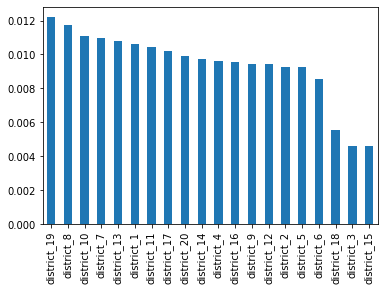

In [11]:
ratio = pd.DataFrame(new['Area'].value_counts())
ratio['Population'] = areas['Area'].value_counts()
ratio['Coverage'] = ratio['Area'] / ratio['Population']
ratio.sort_values(['Coverage'], inplace=True, ascending=False)
ratio['Coverage'].plot(kind='bar')

In [7]:
df = pd.merge(areas, visits, on=['Beneficiary'])

## (A) Healthcare Received per District

This shows how many times a Beneficiary was visites by a User per District. Higher amount shows that the Beneficiaries in that disctrict have better access to healthcare.

Found by dividing **total number of visits per user** (home and clinic) by **total number of beneficiaries per district.**

According to this metric, Districts **14, 5, 3, 18, 3 and 15** are not recieving sufficient amounts of healthcare.

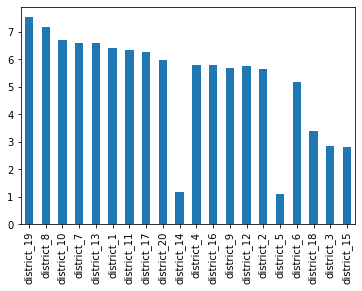

In [8]:
total = pd.DataFrame(df.groupby(['Area'])['User'].value_counts())
total.groupby(['Area'])['User'].sum()

ratio['Visits'] = total.groupby(['Area'])['User'].sum()
ratio['Care'] = ratio['Visits'] / ratio['Population']
ratio['Care'].plot(kind='bar')

## (B) Each User's Visit Amount per Beneficiary

Found by dividing **total number of visits per user** (home and clinic) by **total number of beneficiaries per user**

According to this metric, Users **7, 13, 25, 12, 18, 24** are overperforming whereas **15, 6, 19, and 23** are underperforming

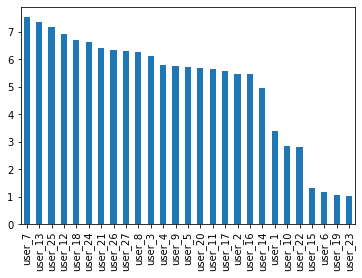

In [9]:
visit_per_patient= df['User'].value_counts() / areas['User'].value_counts()
visit_per_patient.sort_values(ascending=False).plot(kind='bar')